# Fruits Classification using RandomForestClassifier

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

In [3]:
fruits = pd.read_table('fruit_data_with_colors.txt')

In [4]:
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [5]:
fruits.shape

(59, 7)

In [6]:
fruits['fruit_name'].unique()

array(['apple', 'mandarin', 'orange', 'lemon'], dtype=object)

In [7]:
feature_names = ['mass', 'width', 'height', 'color_score']
y = fruits['fruit_name']
X = fruits[feature_names]

In [8]:
X.head()

,mass,width,height,color_score
0,192,8.4,7.3,0.55
1,180,8.0,6.8,0.59
2,176,7.4,7.2,0.60
3,86,6.2,4.7,0.80
4,84,6.0,4.6,0.79


In [9]:
X.shape

(59, 4)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1234)

In [11]:
rf = RandomForestClassifier(criterion = 'entropy', n_estimators = 100)
rf.fit(X_train, y_train)
rf_predict = rf.predict(X_test)

accuracy_rf = accuracy_score(y_test, rf_predict)

print("The accuracy for the Random Forest algorithm is:", accuracy_rf)

The accuracy for the Random Forest algorithm is: 1.0


In [12]:
cv_scores_rf = cross_val_score(rf, X, y, cv = 5, scoring = 'accuracy')

cv_mean_rf = cv_scores_rf.mean()
cv_std_rf = cv_scores_rf.std()

print("The mean cross validation score is:", cv_mean_rf)
print("The standard deviation cross validation score is:", cv_std_rf)

The mean cross validation score is: 0.9166666666666666
The standard deviation cross validation score is: 0.05270462766947298


In [13]:
cm = confusion_matrix(y_test, rf_predict)
cm_df = pd.DataFrame(cm, index=fruits['fruit_name'].unique(), columns=fruits['fruit_name'].unique())

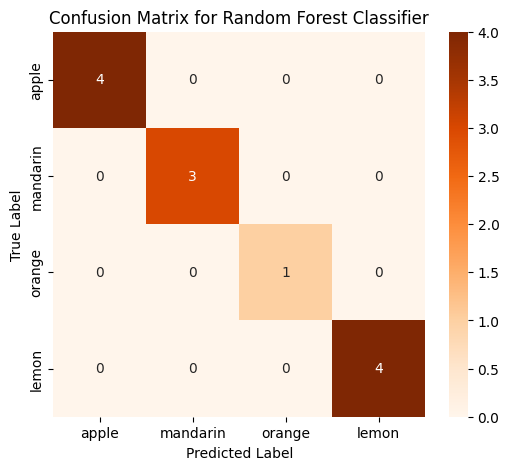

In [14]:
plt.figure(figsize=(6, 5))
sns.heatmap(cm_df, annot=True, cmap='Oranges')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

This confusion matrix demonstrates that RandomForestClassifier is able to identify all fruits accurately based on the mass, width, height, and color score provided
